# Mô hình hồi quy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Đọc dữ liệu

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/tranlybuu/BaiTap/main/2022/insurance.csv")
df1.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Mã hóa các biến của cột Sex - Smoker - Region

In [3]:
from sklearn import preprocessing
df = df1[df1.columns[:]].apply(preprocessing.LabelEncoder().fit_transform)

Chia tập dữ liệu để đào tạo và kiểm thử

In [4]:
input = df.iloc[:,0:6]
output = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.3, random_state=0)

Mô hình hồi quy tuyến tính

In [18]:
from sklearn import linear_model
model = linear_model.LinearRegression(n_jobs=10)
model.fit(x_train, y_train)

LinearRegression()

Kiểm thử mô  hình với tập dữ liệu test

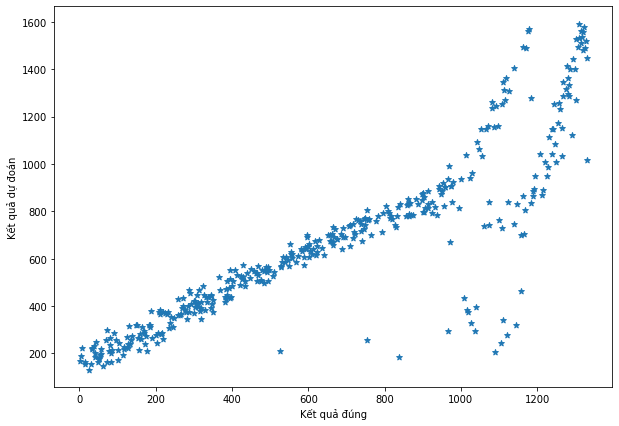

In [19]:
y_pred = model.predict(x_test)
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred, marker='*')
plt.xlabel("Kết quả đúng")
plt.ylabel("Kết quả dự đoán")
plt.show()

Kết quả

In [20]:
print('10-fold cv =',sklearn.model_selection.cross_val_score(estimator=model, X=x_train, y=y_train, cv=10))
print('R2 =',model.score(x_train, y_train))
print('MSE =', sklearn.metrics.mean_squared_error(y_test, y_pred))
print('RMSE =', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

10-fold cv = [0.76826761 0.77341726 0.77342462 0.85466765 0.60815262 0.76886768
 0.69367642 0.76774235 0.69537618 0.78994604]
R2 = 0.7605064338590186
MSE = 37239.91666093128
RMSE = 192.97646659873135
